### Import Libraries

In [1]:
import pandas as pd # for data preprocessing
import numpy as np # for linear algebra
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from sklearn.preprocessing import StandardScaler # for Scaling the data
from sklearn.metrics import mean_squared_error # for calculating mean square error
from sklearn.model_selection import train_test_split # for train-test-split
from sklearn.metrics import r2_score,mean_absolute_error # other scoring metrics

### Import ML Models

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

### Load Data

In [3]:
df = pd.read_csv('task2.csv')
df.head() # show top 5 records

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualiztion

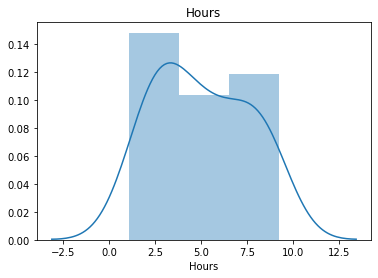

Skewness : 0.1903382010052985


In [6]:
sns.distplot(df.Hours)
plt.title('Hours')
plt.show()
print(f"Skewness : {df.Hours.skew()}")

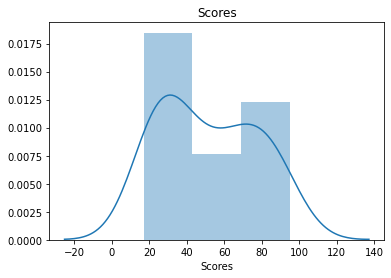

Skewness : 0.2339646665397317


In [7]:
sns.distplot(df.Scores)
plt.title('Scores')
plt.show()
print(f"Skewness : {df.Scores.skew()}")

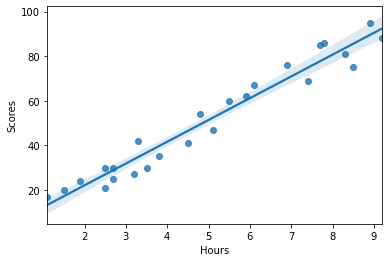

In [8]:
sns.regplot(x=df.Hours,y=df.Scores)

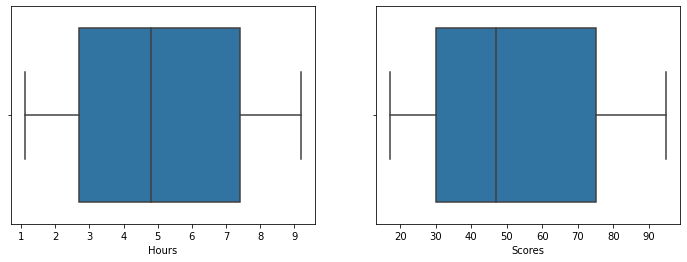

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(df['Hours'])
plt.subplot(122)
sns.boxplot(df['Scores'])
plt.show()

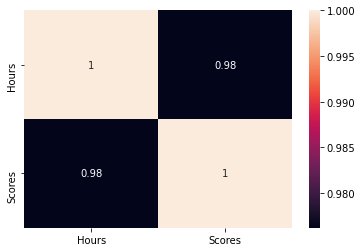

In [10]:
sns.heatmap(df.corr(),annot=True)

### Dependent And Indepent Features

In [11]:
X = df.Hours.values
y = df.Scores.values

### Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [13]:
X_train.shape,y_train.shape

((20,), (20,))

In [14]:
X_test.shape,y_test.shape

((5,), (5,))

### Reshape X_train, X_test

In [15]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

### Scaling 

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Create a function for model scoring

In [17]:
def model_scores(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print("Mean Squared Error for Train Data : ",mean_squared_error(y_train,y_train_pred))
    print("R2 Score Train Data : ",r2_score(y_train,y_train_pred))
    print("Mean Squared Test Data: ",mean_squared_error(y_test,y_test_pred))
    print("R2 Score Test Data : ",r2_score(y_test,y_test_pred))

## Model Selection

### Linear Regression

In [18]:
linear = LinearRegression()
model_scores(linear,X_train_scaled,y_train,X_test_scaled,y_test)

Mean Squared Error for Train Data :  30.89818237731451
R2 Score Train Data :  0.9515510725211553
Mean Squared Test Data:  21.598769307217434
R2 Score Test Data :  0.9454906892105355


### Lasso

In [19]:
lasso = Lasso()
model_scores(lasso,X_train_scaled,y_train,X_test_scaled,y_test)

Mean Squared Error for Train Data :  31.898182377314527
R2 Score Train Data :  0.9499830538303725
Mean Squared Test Data:  19.466547963051635
R2 Score Test Data :  0.9508718252497182


In [20]:
ridge = Ridge()
model_scores(ridge,X_train_scaled,y_train,X_test_scaled,y_test)

Mean Squared Error for Train Data :  32.27425792747934
R2 Score Train Data :  0.9493933603385676
Mean Squared Test Data:  19.29967295361417
R2 Score Test Data :  0.9512929715485207


### SVR

In [21]:
svr = SVR(kernel='rbf')
model_scores(svr,X_train_scaled,y_train,X_test_scaled,y_test)

Mean Squared Error for Train Data :  396.39745879755196
R2 Score Train Data :  0.37844137562663593
Mean Squared Test Data:  284.5969278896682
R2 Score Test Data :  0.2817561884472334


In [22]:
svr = SVR(kernel='poly')
model_scores(svr,X_train_scaled,y_train,X_test_scaled,y_test)

Mean Squared Error for Train Data :  207.56318310375596
R2 Score Train Data :  0.6745370493749392
Mean Squared Test Data:  167.0936590540301
R2 Score Test Data :  0.578301890132167


In [23]:
svr = SVR(kernel='linear')
model_scores(svr,X_train_scaled,y_train,X_test_scaled,y_test)

Mean Squared Error for Train Data :  111.25187091486046
R2 Score Train Data :  0.8255549870209441
Mean Squared Test Data:  77.58472279601654
R2 Score Test Data :  0.8041976509286883


### KNN

In [24]:
knn = KNeighborsRegressor()
model_scores(knn,X_train_scaled,y_train,X_test_scaled,y_test)

Mean Squared Error for Train Data :  36.510000000000005
R2 Score Train Data :  0.9427516375995202
Mean Squared Test Data:  35.855999999999966
R2 Score Test Data :  0.9095093882495457


### Decision Tree

In [25]:
tree = DecisionTreeRegressor()
model_scores(tree,X_train_scaled,y_train,X_test_scaled,y_test)

Mean Squared Error for Train Data :  0.625
R2 Score Train Data :  0.9990199883182608
Mean Squared Test Data:  119.2
R2 Score Test Data :  0.6991722188572582


### Random Forest

In [27]:
rf = RandomForestRegressor(max_depth=3,n_estimators=200)
model_scores(rf,X_train_scaled,y_train,X_test_scaled,y_test)

Mean Squared Error for Train Data :  11.636259327769134
R2 Score Train Data :  0.9817541278832623
Mean Squared Test Data:  56.795676255426926
R2 Score Test Data :  0.8566634457514968


### Gradient Boosting

In [28]:
gb = GradientBoostingRegressor()
model_scores(gb,X_train_scaled,y_train,X_test_scaled,y_test)

Mean Squared Error for Train Data :  0.638414307217466
R2 Score Train Data :  0.9989989544338199
Mean Squared Test Data:  117.22794306712603
R2 Score Test Data :  0.7041491442884967


### Extreme Gradient Boosting

In [29]:
xgb = XGBRegressor()
model_scores(xgb,X_train_scaled,y_train,X_test_scaled,y_test)

Mean Squared Error for Train Data :  0.6250024144916096
R2 Score Train Data :  0.9990199845322928
Mean Squared Test Data:  120.57126299904485
R2 Score Test Data :  0.6957115308927799


## Model Creation

#### Since there is a linear relation between x and y , mean square error is less  and r2_score is good we will use Linear Regression 

In [30]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test_scaled)

In [32]:
## mean square error
mean_squared_error(y_test,y_pred)

21.598769307217434

In [33]:
## r2 score
r2_score(y_test,y_pred)

0.9454906892105355

In [34]:
## mean absolute error
mean_absolute_error(y_test,y_pred)

4.18385989900298

In [35]:
## root mean square error
np.sqrt(mean_squared_error(y_test,y_pred))

4.64744761210037

### Visualize Train Set

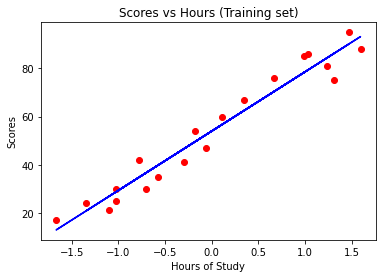

In [36]:
plt.scatter(X_train_scaled, y_train, color = 'red')
plt.plot(X_train_scaled, model.predict(X_train_scaled), color = 'blue')
plt.title('Scores vs Hours (Training set)')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.show()

## Visualize Test Set

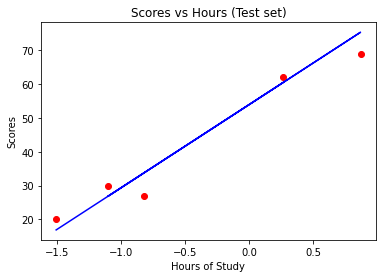

In [37]:
plt.scatter(X_test_scaled, y_test, color = 'red')
plt.plot(X_test_scaled, model.predict(X_test_scaled), color = 'blue')
plt.title('Scores vs Hours (Test set)')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.show()

In [38]:
# compare test data and predicted data
compare = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
compare

,y_test,y_pred
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


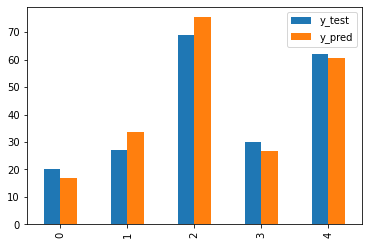

In [41]:
# Visualize y_test and y_pred
compare.plot(kind='bar')

### Make Prediction For One Values

In [45]:
# function to predict one value
def single_prediction(value):
    value1 = np.array([value]).reshape(-1,1)
    value_scaled = scaler.transform(value1)
    prediction = model.predict(value_scaled)[0]
    return f"Predicted Score is {round(prediction,2)} for {value} hours of study"

In [46]:
print(single_prediction(9.35))

Predicted Score is 94.68 for 9.35 hours of study
